# Reading a Screenshot using OCR
Computer Vision

## Requirements for this notebook
- [pytesseract](https://pypi.org/project/pytesseract/)
- [tesseract](https://github.com/UB-Mannheim/tesseract/wiki) (for Windows)
- [cv2](https://pypi.org/project/opencv-python/)
- [imutils](https://pypi.org/project/imutils/)
- [numpy](https://pypi.org/project/numpy/) (Optional)

In [1]:
from matplotlib import pyplot as plt # For developing only
import imutils
import cv2
import pytesseract
import re

In [2]:
def show_image(image, title=None, conversion=cv2.COLOR_BGR2RGB): # To be used in Jupyter Notebook only

    # Converts from one colour space to the other. this is needed as RGB
    # is not the default colour space for OpenCV
    image = cv2.cvtColor(image, conversion)

    # Show the image
    plt.imshow(image)

    # remove the axis / ticks for a clean looking image
    plt.xticks([])
    plt.yticks([])

    # if a title is provided, show it
    if title is not None:
        plt.title(title)

    plt.show()

### Steps to execute the reading of a screenshot
1. Import the required libraries
2. Read the image using cv2
3. Use function pre_gray() to convert the image to grayscale and add a threshold
4. Before using the read_photo() function and pass the image as a parameter. (make sure to change the path to the tesseract.exe file). This will get all the text from the image.
5. Lastly, to get the desired test use the get_lines_needed() function and pass the text as a parameter. This will return a list of strings, contains the important information from the image.

In [3]:
def read_photo(image):
    """Reads the image and returns the text in the image"""
    # this is the path to the tesseract executable file
    pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
    text = pytesseract.image_to_string(image)
    return text

In [68]:
import numpy as np
def pre_gray(img):
    """Converts the image to grayscale and add Threshold"""
    
    # This enhances the image
    dst = cv2.detailEnhance(img, sigma_s=10, sigma_r=0.15)
    
    # This converts the image to grayscale
    gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY) # Converts to grayscale
    kernel = np.ones((1, 1), np.float16)
    
    t,thresh = cv2.threshold(gray, 0, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C | cv2.THRESH_OTSU)# Add threshold
    # invert the threshold
    thresh = cv2.bitwise_not(thresh)
    dilete = cv2.dilate(thresh,kernel,iterations = 1)
    # expand the layer or the dark spot
    # This is for debugging purposes
    show_image(dst, "Enhanced")
    show_image(gray, "Gray")
    show_image(thresh, "Gray + Threshold")
    show_image(dilete, "Gray + Threshold + Dilated")


    return dilete

In [5]:

def get_lines_needed(raw_text):
    """Returns the lines needed for the report"""
    # Regex pattern to get the lines needed
    pattern1= re.compile(r"(\(Team\) ([A-Za-z0-9\! ]+\w): ([A-Za-z0-9\! ]+\w))") # Format: (Team) username: message
    pattern2= re.compile(r"(\(Party\) ([A-Za-z0-9\! ]+\w): ([A-Za-z0-9\! ]+\w))")
    pattern3= re.compile(r"([A-Za-z0-9\! \(\)]+\w)")
    # Preprocessing the image to make it clear for the detection and read it properly
    prepro = pre_gray(raw_text)
    # Read the image and split it by lines to make it a array
    lines = read_photo(prepro).split("\n")
    # Get the lines needed for the report
    team= [line for line in lines if pattern1.match(line)]
    party= [line for line in lines if pattern2.match(line)]
    alls= [line for line in lines if pattern3.match(line)]

    # Return the lines needed
    return (team, party, alls)

In [69]:
get_lines_needed(cv2.imread("1.png"))

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'dilate'
> Overload resolution failed:
>  - kernel data type = 23 is not supported
>  - Expected Ptr<cv::UMat> for argument 'kernel'


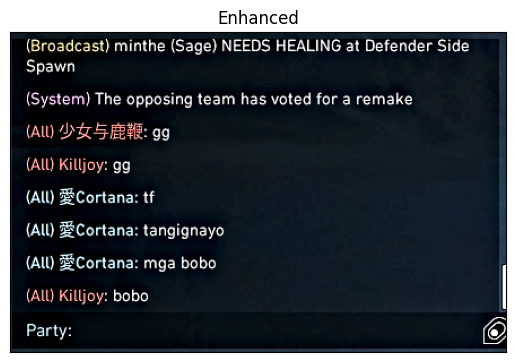

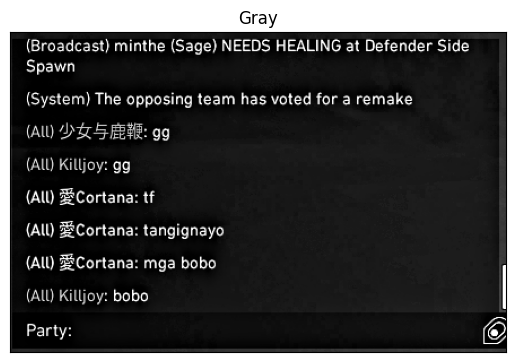

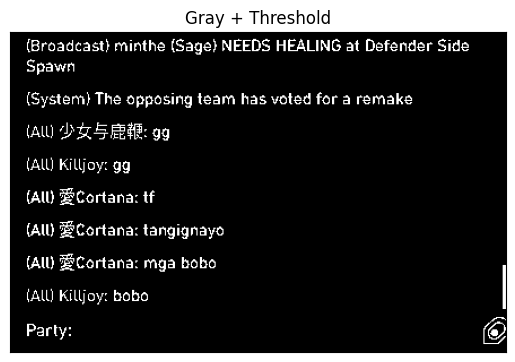

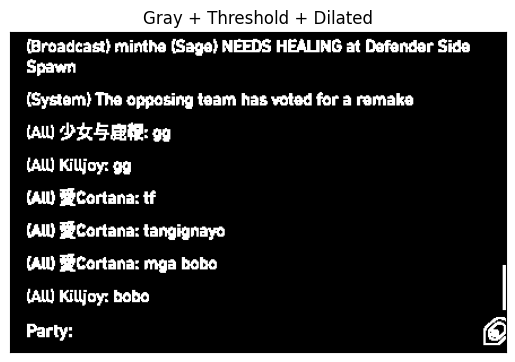

([],
 [],
 ['Spawn',
  '(System) The opposing taam has voted for a ramake',
  '(AW DSR: 9g',
  '(Alb BCortana: tf',
  '(AlN Kiljoy: bobo',
  'Party:'])

In [65]:
get_lines_needed(cv2.imread("4.png"))